 # TAXI PRICE PREDICTION

### Linear Regression Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv(r"C:\Users\rkeer\Downloads\archive (48)\taxi_trip_pricing.csv")
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [4]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [5]:
df.shape

(1000, 11)

In [6]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [10]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [9]:
df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].mean(),inplace=True)
df['Passenger_Count'].fillna(df['Passenger_Count'].mean(),inplace=True)
df['Base_Fare'].fillna(df['Base_Fare'].mean(),inplace=True)
df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].mean(),inplace=True)
df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].mean(),inplace=True)
df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].mean(),inplace=True)
df['Trip_Price'].fillna(df['Trip_Price'].mean(),inplace=True)
df['Time_of_Day'].fillna('Unknown',inplace=True)
df['Day_of_Week'].fillna('Unknown',inplace=True)
df['Traffic_Conditions'].fillna('Unknown',inplace=True)
df['Weather'].fillna('Unknown',inplace=True)

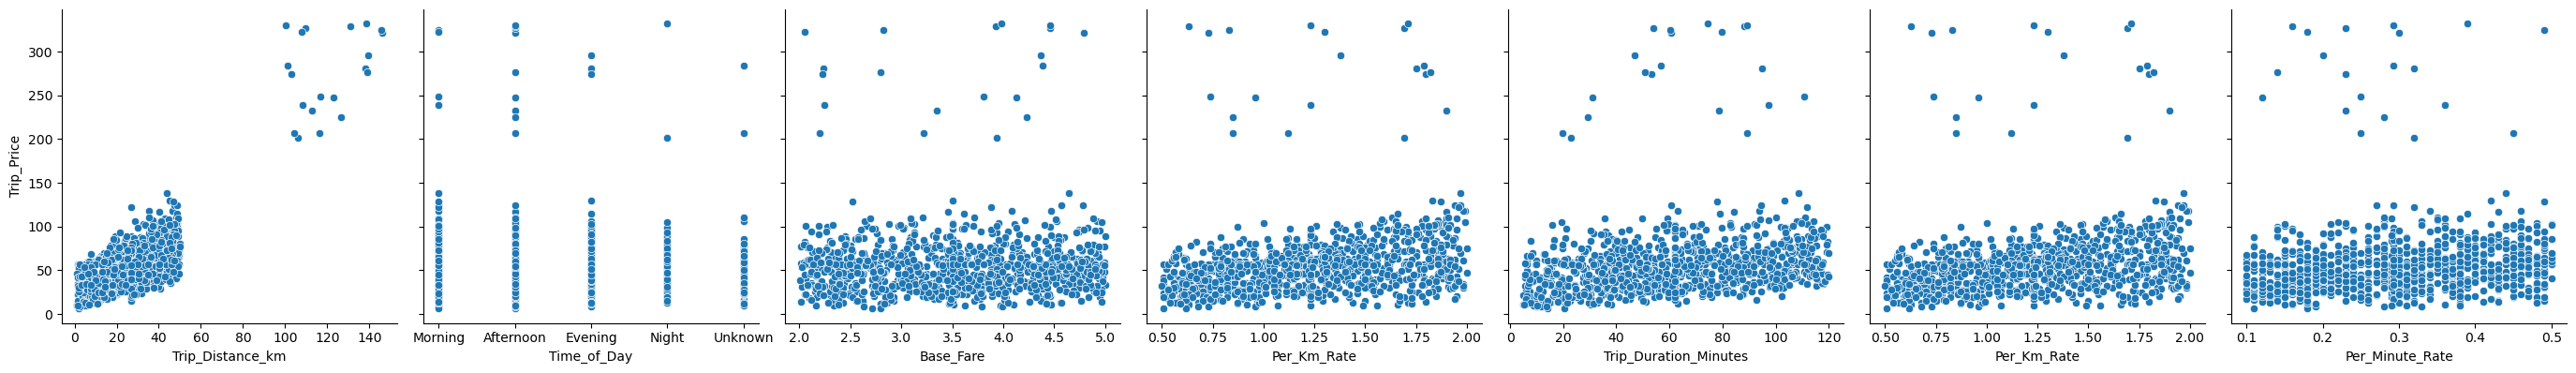

In [11]:
sns.pairplot(df, x_vars=['Trip_Distance_km', 'Time_of_Day', 'Base_Fare','Per_Km_Rate','Trip_Duration_Minutes','Per_Km_Rate','Per_Minute_Rate'], y_vars='Trip_Price', height=4)
plt.show()

In [12]:
X = df['Trip_Distance_km']
Y = df['Trip_Price']

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 11)

In [18]:
X_train.shape

(800, 1)

In [15]:
X_train = X_train.values.reshape(-1,1)

In [19]:
X_test.shape

(200, 1)

In [17]:
X_test = X_test.values.reshape(-1,1)

In [16]:
Model = LinearRegression()

In [17]:
Model.fit(X_train,Y_train)

LinearRegression()

In [18]:
Pred = Model.predict(X_test)

In [19]:
print("R2_Score:", r2_score(Y_test,Pred))
print("Mean_Absolute_Error:", mean_absolute_error(Y_test,Pred))
print("Mean_Squared_Error:", mean_squared_error(Y_test,Pred))

R2_Score: 0.3385035799304945
Mean_Absolute_Error: 17.530150936858863
Mean_Squared_Error: 480.7832022524579


In [22]:
param_grids = {
    "alpha": np.logspace(-3,3,100)
}

### RIDGE & LASSO

In [222]:
Ridge = Ridge() 
Lasso = Lasso()

### Ridge

In [223]:
param_grids = {
    "alpha": np.logspace(-3,3,100)
}

In [224]:
ridge_grid = GridSearchCV(Ridge, param_grid = param_grids, scoring='neg_mean_squared_error', cv=5, verbose = 3)

In [225]:
ridge_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ....................alpha=0.001;, score=-414.342 total time=   0.0s
[CV 2/5] END ....................alpha=0.001;, score=-598.999 total time=   0.0s
[CV 3/5] END ....................alpha=0.001;, score=-380.742 total time=   0.0s
[CV 4/5] END ....................alpha=0.001;, score=-580.954 total time=   0.0s
[CV 5/5] END ....................alpha=0.001;, score=-480.469 total time=   0.0s
[CV 1/5] END ....alpha=0.0011497569953977356;, score=-414.342 total time=   0.0s
[CV 2/5] END ....alpha=0.0011497569953977356;, score=-598.999 total time=   0.0s
[CV 3/5] END ....alpha=0.0011497569953977356;, score=-380.742 total time=   0.0s
[CV 4/5] END ....alpha=0.0011497569953977356;, score=-580.954 total time=   0.0s
[CV 5/5] END ....alpha=0.0011497569953977356;, score=-480.469 total time=   0.0s
[CV 1/5] END ....alpha=0.0013219411484660286;, score=-414.342 total time=   0.0s
[CV 2/5] END ....alpha=0.0013219411484660286;,

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1....
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error', verbose=3)

In [226]:
ridge_grid.best_estimator_

Ridge(alpha=0.001)

In [227]:
new_model = ridge_grid.best_estimator_

In [228]:
pred = new_model.predict(X_test)

In [229]:
print("Best Parameters:", ridge_grid.best_params_)
print("Best Score:", ridge_grid.best_score_)

Best Parameters: {'alpha': 0.001}
Best Score: -491.10111396507364


In [230]:
print("R2_Score:",r2_score(Y_test,pred))
print("Mean_Absolute_Error:",mean_absolute_error(Y_test,pred))
print("Mean_Squared_Error:",mean_squared_error(Y_test,pred))

R2_Score: 0.33850358147844795
Mean_Absolute_Error: 17.530150911106468
Mean_Squared_Error: 480.7832011273876


### Lasso

In [231]:
param_grids = {
    "alpha": np.logspace(-3,3,100)
}

In [232]:
Lasso_grid = GridSearchCV(Lasso, param_grid = param_grids, scoring='neg_mean_squared_error', cv=5, verbose = 3)

In [233]:
Lasso_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ....................alpha=0.001;, score=-414.342 total time=   0.0s
[CV 2/5] END ....................alpha=0.001;, score=-598.999 total time=   0.0s
[CV 3/5] END ....................alpha=0.001;, score=-380.742 total time=   0.0s
[CV 4/5] END ....................alpha=0.001;, score=-580.954 total time=   0.0s
[CV 5/5] END ....................alpha=0.001;, score=-480.469 total time=   0.0s
[CV 1/5] END ....alpha=0.0011497569953977356;, score=-414.342 total time=   0.0s
[CV 2/5] END ....alpha=0.0011497569953977356;, score=-598.999 total time=   0.0s
[CV 3/5] END ....alpha=0.0011497569953977356;, score=-380.742 total time=   0.0s
[CV 4/5] END ....alpha=0.0011497569953977356;, score=-580.954 total time=   0.0s
[CV 5/5] END ....alpha=0.0011497569953977356;, score=-480.469 total time=   0.0s
[CV 1/5] END ....alpha=0.0013219411484660286;, score=-414.342 total time=   0.0s
[CV 2/5] END ....alpha=0.0013219411484660286;,

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1....
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error', verbose=3)

In [234]:
NewModel_ = Lasso_grid.best_estimator_

In [235]:
Prediction = NewModel_.predict(X_test)

In [236]:
print("Best Parameters:", Lasso_grid.best_params_)
print("Best Score:", Lasso_grid.best_score_)

Best Parameters: {'alpha': 0.001}
Best Score: -491.1011236239072


In [237]:
print("R2_Score:",r2_score(Y_test,Prediction))
print("Mean_Absolute_Error:",mean_absolute_error(Y_test,Prediction))
print("Mean_Squared_Error:",mean_squared_error(Y_test,Prediction))

R2_Score: 0.3385042896601933
Mean_Absolute_Error: 17.53013912947056
Mean_Squared_Error: 480.7826864127543


### KNN Algorithm Model

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [259]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42)

In [263]:
X_train.shape

(800, 1)

In [261]:
X_train = X_train.values.reshape(-1,1)

In [266]:
X_test.shape

(200, 1)

In [265]:
X_test = X_test.values.reshape(-1,1)

In [267]:
KNN = KNeighborsRegressor(n_neighbors=1)

In [268]:
KNN.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=1)

In [269]:
Pred3 = KNN.predict(X_test)

In [270]:
print("R2_Score:",r2_score(Y_test,Pred3))
print("Mean_Absolute_Error:",mean_absolute_error(Y_test,Pred3))
print("Mean_Squared_Error:",mean_squared_error(Y_test,Pred3))

R2_Score: 0.1319357956241235
Mean_Absolute_Error: 21.160441540772712
Mean_Squared_Error: 720.8092996593446


In [271]:
param_grids = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Values for k
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

In [272]:
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grids, cv=5, scoring = 'neg_mean_squared_error', n_jobs=-1)

In [273]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=1), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11]},
             scoring='neg_mean_squared_error')

In [274]:
_New_Model_ = grid_search.best_estimator_

In [275]:
pred3 = _New_Model_.predict(X_test)

In [276]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Score: 397.31513473416834


In [277]:
print("R2_Score:",r2_score(Y_test,pred3))
print("Mean_Absolute_Error:",mean_absolute_error(Y_test,pred3))
print("Mean_Squared_Error:",mean_squared_error(Y_test,pred3))

R2_Score: 0.5357131774495435
Mean_Absolute_Error: 16.14028625977669
Mean_Squared_Error: 385.527081656677


### SVM Algorithm Model

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [279]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42)

In [284]:
X_train.shape

(800, 1)

In [281]:
X_train = X_train.values.reshape(-1,1)

In [285]:
X_test.shape

(200, 1)

In [283]:
X_test = X_test.values.reshape(-1,1)

In [286]:
SVM = SVR(C=11,kernel='rbf',gamma=1)

In [287]:
SVM.fit(X_train,Y_train)

SVR(C=11, gamma=1)

In [288]:
Pred4 = SVM.predict(X_test)

In [289]:
print("R2_Score:",r2_score(Y_test,Pred4))
print("Mean_Absolute_Error:",mean_absolute_error(Y_test,Pred4))
print("Mean_Squared_Error:",mean_squared_error(Y_test,Pred4))

R2_Score: 0.2781965121982841
Mean_Absolute_Error: 17.007299381373976
Mean_Squared_Error: 599.3596601625816


In [290]:
params_grid={
    'gamma':[0,0.1,0.01,0.2,1,2,3,4,5,6,7,10,'scale'],
    'C':[1,2,3,4,5,10,15,20,25,30,35,50],
    'kernel':['rbf']
}

In [291]:
grided = SVR()
grid_model = GridSearchCV(estimator = SVM, param_grid = params_grid, cv=5,scoring = 'neg_mean_squared_error', n_jobs=-1)

In [292]:
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVR(C=11, gamma=1), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 50],
                         'gamma': [0, 0.1, 0.01, 0.2, 1, 2, 3, 4, 5, 6, 7, 10,
                                   'scale'],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

In [293]:
NewModel = grid_model.best_estimator_

In [294]:
pred4 = NewModel.predict(X_test)

In [295]:
print("Best Parameters:", grid_model.best_params_)
print("Best Score:", -grid_model.best_score_)

Best Parameters: {'C': 35, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 389.74124661835543


In [296]:
print("R2_Score:",r2_score(Y_test,pred4))
print("Mean_Absolute_Error:",mean_absolute_error(Y_test,pred4))
print("Mean_Squared_Error:",mean_squared_error(Y_test,pred4))

R2_Score: 0.562245296613725
Mean_Absolute_Error: 15.643108917543291
Mean_Squared_Error: 363.49576399975064
